In [1]:
import cv2 as cv
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# RGB to HSV using for loop

In [2]:
# Load Image
img = cv.imread("bird.jpg")

# Time calculation begins
e1 = cv.getTickCount()

h, w = img.shape[0], img.shape[0]

# creating dummy matrix/arrays using zeros
H = np.zeros((h, w), dtype= np.uint8)
S = np.zeros((h, w), dtype= float)
V = np.zeros((h, w), dtype= float)

for i in range(h):
    for j in range(w):
        
        R = img[i,j,2] / 255
        G = img[i,j,1] / 255
        B = img[i,j,0] / 255
        
        mx = np.max([B,G,R]) 
        mn = np.min([B,G,R])
        
        #calculating the difference
        diff = mx - mn
        
        # calculating the Hue value
        if diff == 0:
            H[i,j] = 0
        elif mx == R:
            H[i,j] = 60* ((G - B)/(diff))
        elif mx == G:
            H[i,j] = 60* (((B - R)/(diff))+2)
        elif mx == B:
            H[i,j] = 60* (((R - G)/(diff))+4)
 
        # Calculate S
        if mx ==0:
            S[i,j] = 0
        else:
            S[i,j] = (diff / mx)

        # Calculating the intensity value
        V[i,j] = mx
        
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print(time)

0.5763309


### For example, if you have a 32-bit floating-point image directly converted from an 8-bit image without any scaling, then it will have the 0..255 value range instead of 0..1 assumed by the function. So, before calling cvtColor , you need first to scale the image down

* 255 for CV_8U, 65535 for CV_16U, 1 for CV_32F

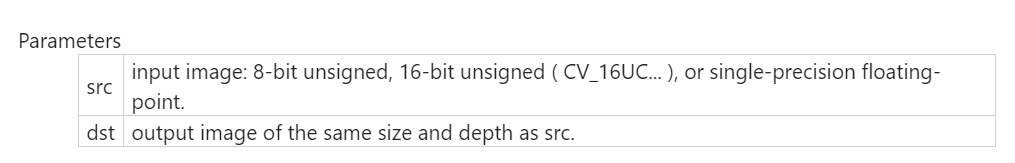
 


In [3]:
def channel_norm(img_ch):
    
    # creating dummy matrix for dark image to store pixel values after normalization
    dark_img = np.zeros((h, w), dtype = np.uint8)
    
    min_lmt = np.min(img_ch)
    max_lmt = np.max(img_ch)
    
    # iterating through the single channel image dimensions
    for i in range(0, h):
        for j in range(0, w):
            
            # using normalization to calculate the values and combining them back into dummy matrix
            dark_img[i][j]= (255*(img_ch[i][j]-min_lmt))//(max_lmt - min_lmt)
    
    return dark_img

In [4]:
# Applying normalization on all the three channels
H = channel_norm(H) 
S = channel_norm(S)
V = channel_norm(V)

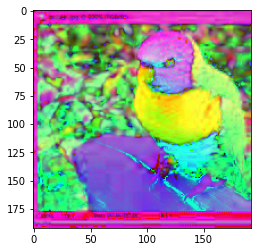

In [5]:
# Merging all channels together to get the final result
# Combine 4 channels into single image and re-scale back up to uint8
# HSV = (np.dstack((H, S, V)*255).astype(np.uint8))

hsv_img = cv.merge((H,S,V))       
hsv_img = cv.cvtColor(hsv_img , cv.COLOR_BGR2RGB) # converting BGR to RGB 
plt.imshow(hsv_img)


cv.imshow('HSV Image', hsv_img)
cv.waitKey(0)
cv.destroyAllWindows()    
